In [ ]:
#!pip install -U statsmodels

In [3]:
# This simply sets up the notebook. Don't worry about this for now.

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import statsmodels.formula.api as smf
%matplotlib inline

# Introduction to Statistics
In this jupyter notebook, we will learn basic statistics:

1. [mean, median, mode](#1)
2. standard deviation (SD)
3. t-test
4. correlation
5. and some light regression

## 0. Preparing Our Dataset  <a id='0'></a>
We will use real data [INTRO ABOUT WHAT THE DATA IS: Metadata on Manuscripts]

For the most part, you don't have to worry about all the codes we used to fix the data. Instead you can skip to the end of this section 0 and try to familiarize yourself with the [cleaned dataset](#clean)

In [4]:
df = pd.read_csv('data/BSB-HS.csv')

In [15]:
df.head()

,Author,BSB Catalog,By,Creation,Digital Object Identifier,Extent,Height,Identifier,Label,Language,Location,Object Type,Preferred title of work,Thumbnail,Title,Width,Year,Pages,Area
0,"<span>Christianus, Stabulensis -- (GND: <a hre...",<a href='https://opacplus.bsb-muenchen.de/titl...,Christianus Stabulensis,"[S.l.], 14./15. Jh.",<a href='https://nbn-resolving.org/urn:nbn:de:...,I + 174 Bl. - Pergament,33.952409,BSB-Hss Clm 4527,"Christianus, Stabulensis: Expositio in evangel...",Latin,"München, Bayerische Staatsbibliothek -- Clm 45...",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Expositio in evangelium Matthaei - BSB Clm 4527,23.232533,1450.0,174.0,788.800465
1,"<span>Gratianus, de Clusio -- (GND: <a href='h...",<a href='https://opacplus.bsb-muenchen.de/titl...,NaN,"[S.l.], 14./15. Jh.",<a href='https://nbn-resolving.org/urn:nbn:de:...,342 Bl. - Pergament,50.471658,BSB-Hss Clm 23552,"Gratianus, de Clusio: Gratiani decretum cum gl...",Latin,"München, Bayerische Staatsbibliothek -- Clm 23552",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Gratiani decretum cum glosa - BSB Clm 23552,31.178500,1450.0,342.0,1573.630579
2,"<span>Konrad, von Brundelsheim, Heilsbronn, Ab...",<a href='https://opacplus.bsb-muenchen.de/titl...,NaN,"[S.l.], 1400",<a href='https://nbn-resolving.org/urn:nbn:de:...,283 Bl. - Papier,31.110980,BSB-Hss Clm 8847,"Konrad, von Brundelsheim, Heilsbronn, Abt: Con...",Latin,"München, Bayerische Staatsbibliothek -- Clm 8847",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Conradi Socci sermonum de tempore pars aestiva...,21.488400,1400.0,283.0,668.525183
3,NaN,<a href='https://opacplus.bsb-muenchen.de/titl...,NaN,"[S.l.], 15. Jh.",<a href='https://nbn-resolving.org/urn:nbn:de:...,291 Bl. - Papier,32.988034,BSB-Hss Clm 15141,Haymo episcopus Halberstatensis super Apocalyp...,Latin,"München, Bayerische Staatsbibliothek -- Clm 15141",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Haymo episcopus Halberstatensis super Apocalyp...,21.399500,1400.0,291.0,705.927433
4,"<span>Johannes, de Lignano -- (GND: <a href='h...",<a href='https://opacplus.bsb-muenchen.de/titl...,Johannes de Lignano,"[S.l.] Böhmen (?), um 1400",<a href='https://nbn-resolving.org/urn:nbn:de:...,I + 328 Bl. - Papier,32.674505,BSB-Hss Clm 14257,"Johannes, de Lignano: Commentarius in Decretal...",Latin,"München, Bayerische Staatsbibliothek -- Clm 14257",Buch,NaN,https://api.digitale-sammlungen.de/iiif/image/...,Commentarius in Decretales Gregorii IX. papae ...,22.783800,1400.0,328.0,744.449393


In [7]:
def get_year(x):
    
    if pd.isnull(x):
        return None
    
    pattern0 = r'([0-9]+)\./([0-9]+)\.\sJh\.'
    if re.search(pattern0, x) != None:
        tot = int(re.search(pattern0, x).groups()[0] + '00') + int(re.search(pattern0, x).groups()[1] + '00')
        return tot/2

    pattern3 = r'1\.\sHälfte\s([0-9]+)\.\sJh\.'
    if re.search(pattern3, x) != None:
        return int(re.search(pattern3, x).groups()[0] + '00') - 75
    
    pattern4 = r'2\.\sHälfte\s([0-9]+)\.\sJh\.'
    if re.search(pattern4, x) != None:
        return int(re.search(pattern4, x).groups()[0] + '00') - 25
    
    pattern5 = r'Mitte\s([0-9]+)\.\sJh\.'
    if re.search(pattern5, x) != None:
        return int(re.search(pattern5, x).groups()[0] + '00') - 50

    pattern6 = r'Ende\s([0-9]+)\.\sJh\.'
    if re.search(pattern6, x) != None:
        return int(re.search(pattern6, x).groups()[0] + '00') - 10
    
    pattern7 = r'1\.\sViertel\s([0-9]+)\.\sJh\.'
    if re.search(pattern7, x) != None:
        return int(re.search(pattern7, x).groups()[0] + '00') - 80
    
    pattern8 = r'2\.\sViertel\s([0-9]+)\.\sJh\.'
    if re.search(pattern8, x) != None:
        return int(re.search(pattern8, x).groups()[0] + '00') - 60
    
    pattern9 = r'3\.\sViertel\s([0-9]+)\.\sJh\.'
    if re.search(pattern9, x) != None:
        return int(re.search(pattern9, x).groups()[0] + '00') - 40
    
    pattern10 = r'4\.\sViertel\s([0-9]+)\.\sJh\.'
    if re.search(pattern10, x) != None:
        return int(re.search(pattern10, x).groups()[0] + '00') - 20
    
    pattern1 = r'([0-9]+)\.\sJh\.'
    if re.search(pattern1, x) != None:
        return int(re.search(pattern1, x).groups()[0] + '00') - 100
    
    pattern2 = r'([0-9]{4})'
    if re.search(pattern2, x) != None:
        return int(re.search(pattern2, x).groups()[0])
    
    else:
        return None
    
def get_extent(x):
    
    if pd.isnull(x):
        return None
    
    pattern = r'([0-9]+)\sBl\.'
    if re.search(pattern, x) != None:
        return int(re.search(pattern, x).groups()[0])
    
    else:
        return None
    
    
def fix_lang(x):
    if type(x) == str and len(x) > 0:
        return x
    else:
        return None

In [8]:
df['Year'] = df['Creation'].apply(get_year)
df['Pages'] = df['Extent'].apply(get_extent)
df['Area'] = df['Height'] * df['Width']
df['Language'] = df['Language'].apply(fix_lang)

In [ ]:
#df.head()

### Cleaned Dataset: <a id='clean'></a>

From the cleaned version of the dataset, we will isolate the columns we will use and create a new table called `manuscripts.` We will be working with this to learn basic statistics. Take a look at the first 5 rows of the dataset below:

In [36]:
manuscripts = df[['Year', 'Pages', 'Height', 'Width', 'Area','Language']]
manuscripts.head()

,Year,Pages,Height,Width,Area,Language
0,1450.0,174.0,33.952409,23.232533,788.800465,Latin
1,1450.0,342.0,50.471658,31.178500,1573.630579,Latin
2,1400.0,283.0,31.110980,21.488400,668.525183,Latin
3,1400.0,291.0,32.988034,21.399500,705.927433,Latin
4,1400.0,328.0,32.674505,22.783800,744.449393,Latin


## 1. Mean, Median, Mode  <a id='1'></a>

**Mean**: average
    
**Median**: middle value
    
**Mode**: occurs most often.

Let's say we want to figure out the average number of pages from all the manuscripts in our dataset. To find this, we first isolate the `Pages` coumn and apply the `mean()` function:

In [23]:
manuscripts['Pages'].mean()

150.22863741339492

Great! But that's to easy. And it really doesn't give much insight. What if we want to find out the average page of manuscripts in each of the different languages?

First we isolate the two columns we need: `Language` and `Pages`. Then we apply the `dropna()` function that removes the rows with missing values. After that we
And finally we use the `mean()` function.

In [26]:
manuscripts[['Language', 'Pages']].dropna().groupby(['Language'])['Pages'].mean()

Awesome! Now, can you try figuring out how to get the average `Area` by `Language`?

In [ ]:
#SOLUTION
#manuscripts[['Language', 'Area']].dropna().groupby(['Language'])['Area'].mean()

You can do the same thing to find out the **median** and **mode** using the `median()` and `mode()` functions:

In [31]:
manuscripts['Pages'].median()

140.0

In [34]:
manuscripts['Pages'].mode()

0    1.0
dtype: float64

But more than calculation, what's really powerful is **data visualization**. Looking at each language, let's create a boxplot of the number of pages of each manuscript:

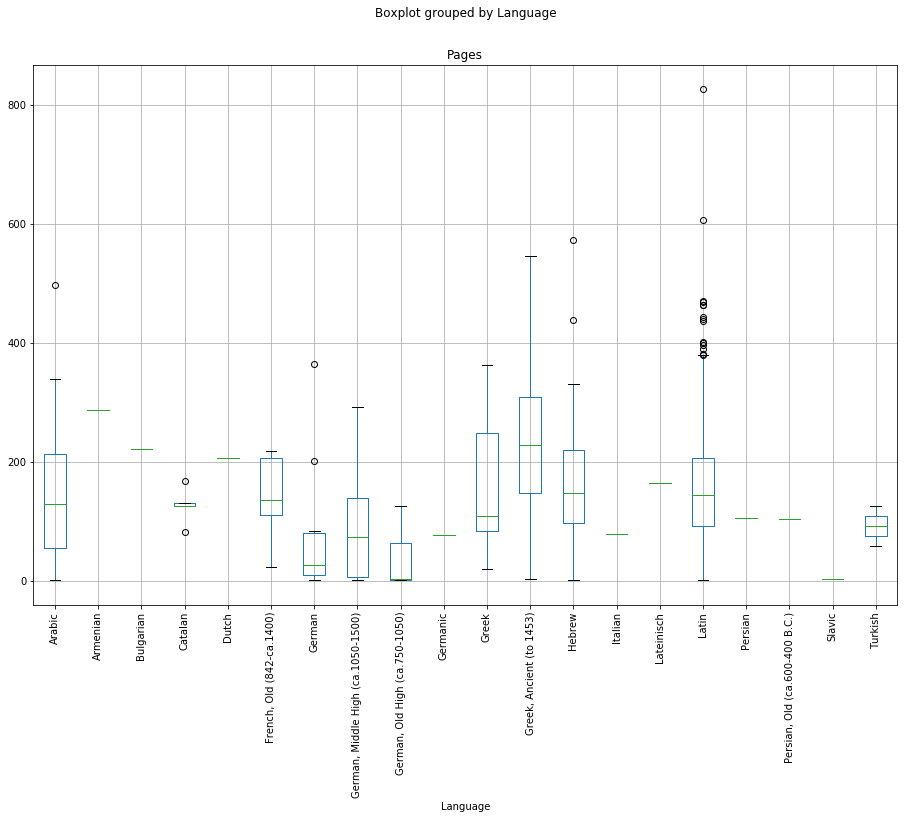

In [25]:
ax = manuscripts[['Language', 'Pages']].dropna().boxplot(column='Pages', by='Language', rot=90, figsize=(15,10))

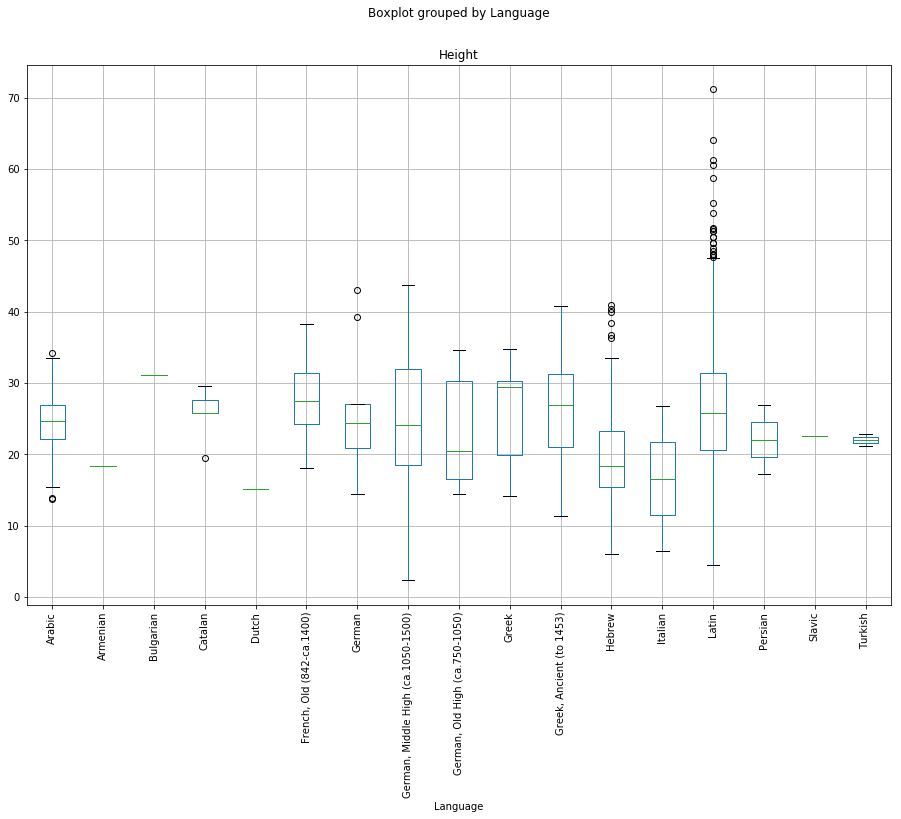

In [27]:
ax = manuscripts[['Language', 'Height']].dropna().boxplot(column='Height', by='Language',rot=90, figsize=(15,10))

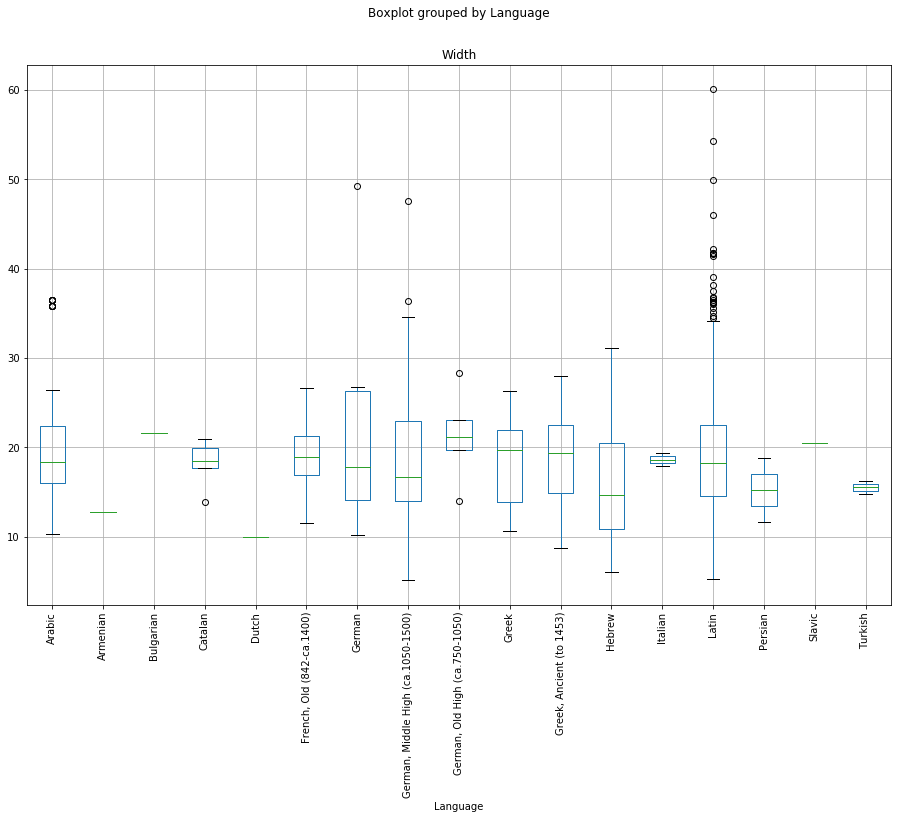

In [28]:
ax = manuscripts[['Language', 'Width']].dropna().boxplot(column='Width', by='Language', rot=90, figsize=(15,10))

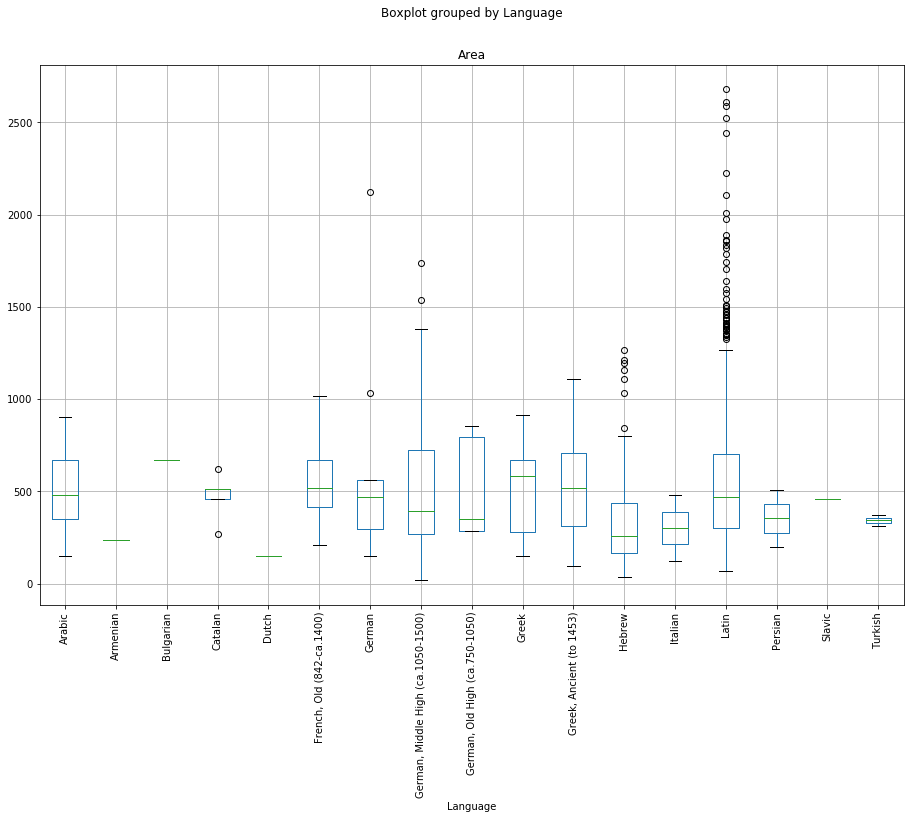

In [29]:
ax = manuscripts[['Language', 'Area']].dropna().boxplot(column='Area', by='Language', rot=90, figsize=(15,10))

In [ ]:
from scipy.stats import ttest_ind

cat1 = df[df['Language']=='German'][['Language', 'Pages']].dropna()
cat2 = df[df['Language']=='Latin'][['Language', 'Pages']].dropna()

ttest_ind(cat1['Pages'], cat2['Pages'])

In [ ]:
df.hist('Year')

In [ ]:
df.plot.scatter('Height', 'Width')

In [ ]:
mod = smf.ols(formula='Width ~ Height', data=df)
res = mod.fit()
print(res.summary())

In [ ]:
df.plot.scatter('Year', 'Pages')

In [30]:
mod = smf.ols(formula='Pages ~ Year', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Pages   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     23.66
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           1.29e-06
Time:                        13:21:39   Log-Likelihood:                -7555.8
No. Observations:                1261   AIC:                         1.512e+04
Df Residuals:                    1259   BIC:                         1.513e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.6679     20.399      2.582      0.0

In [ ]:
df.plot.scatter('Year', 'Area')

In [ ]:
df.corr()

In [ ]:
bins = list(range(700, 1601, 50))

In [ ]:
df['Year_Bins'] = pd.cut(df['Year'], bins)

In [ ]:
df.groupby(['Year_Bins'])['Pages'].mean().plot.barh()